In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Consumer_Complaints.csv')

In [3]:
df.head(5)

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Complaint ID                  62516 non-null  int64 
 1   Submitted via                 62516 non-null  object
 2   Date submitted                62516 non-null  object
 3   Date received                 62516 non-null  object
 4   State                         62516 non-null  object
 5   Product                       62516 non-null  object
 6   Sub-product                   62509 non-null  object
 7   Issue                         62516 non-null  object
 8   Sub-issue                     51658 non-null  object
 9   Company public response       60341 non-null  object
 10  Company response to consumer  62516 non-null  object
 11  Timely response?              61022 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.7+ MB


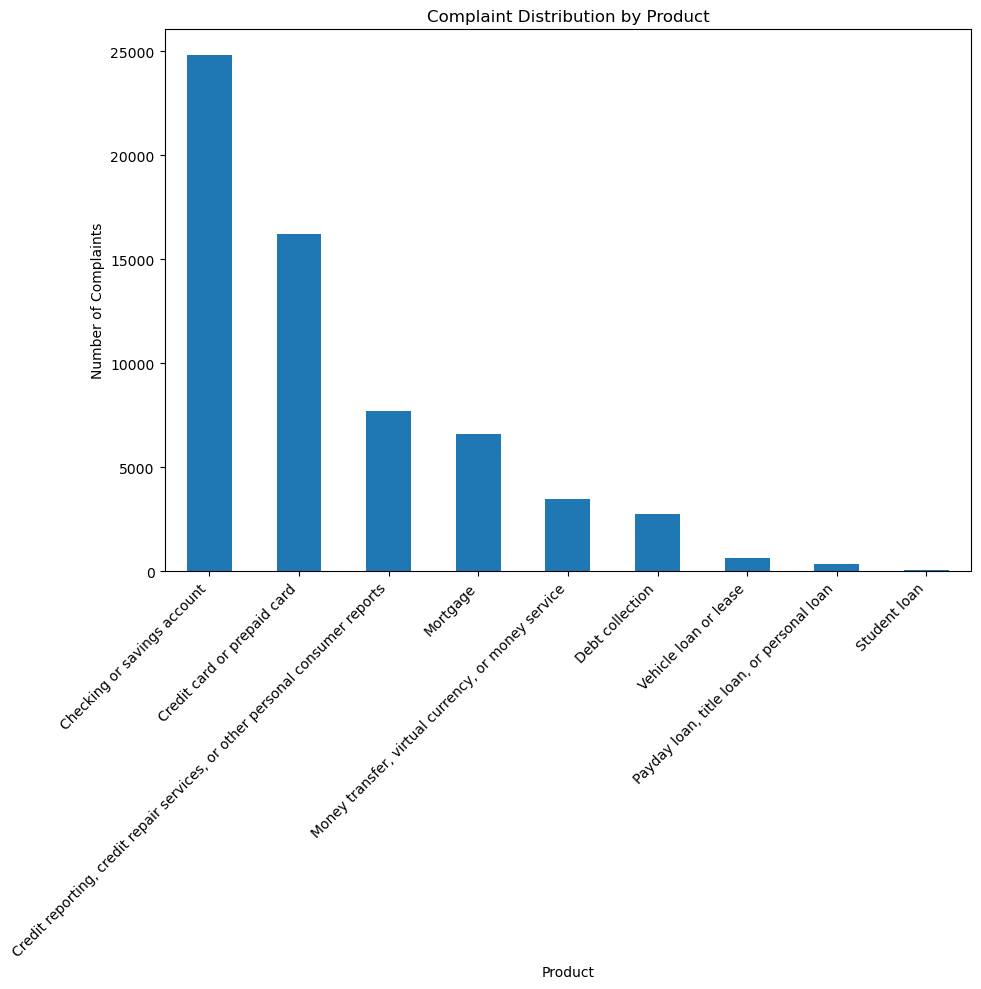

In [41]:
product_distribution = df['Product'].value_counts()

plt.figure(figsize=(10, 10))
product_distribution.plot(kind='bar')
plt.title('Complaint Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

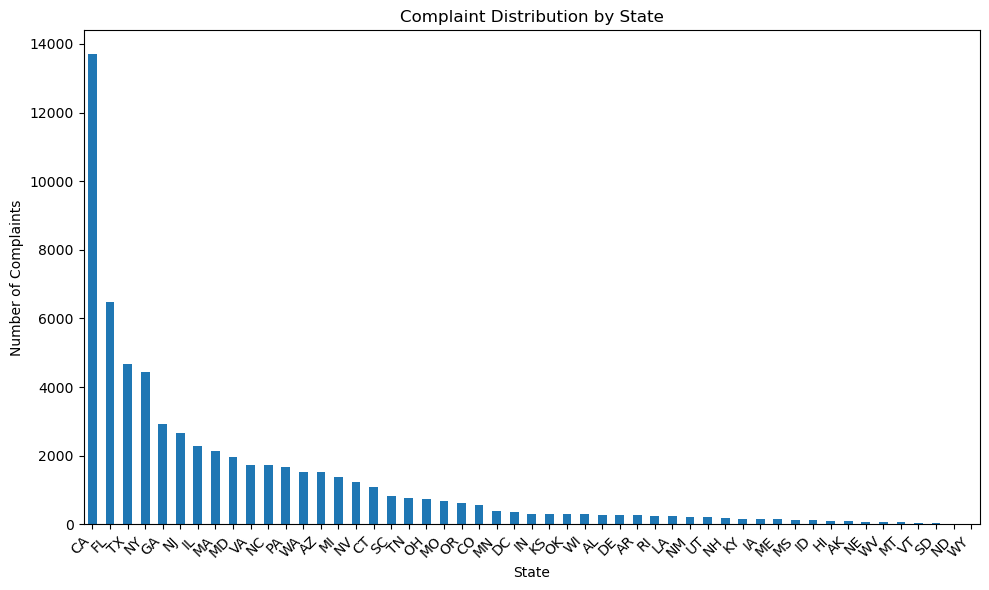

In [42]:
state_distribution = df['State'].value_counts()

plt.figure(figsize=(10, 6))
state_distribution.plot(kind='bar')
plt.title('Complaint Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

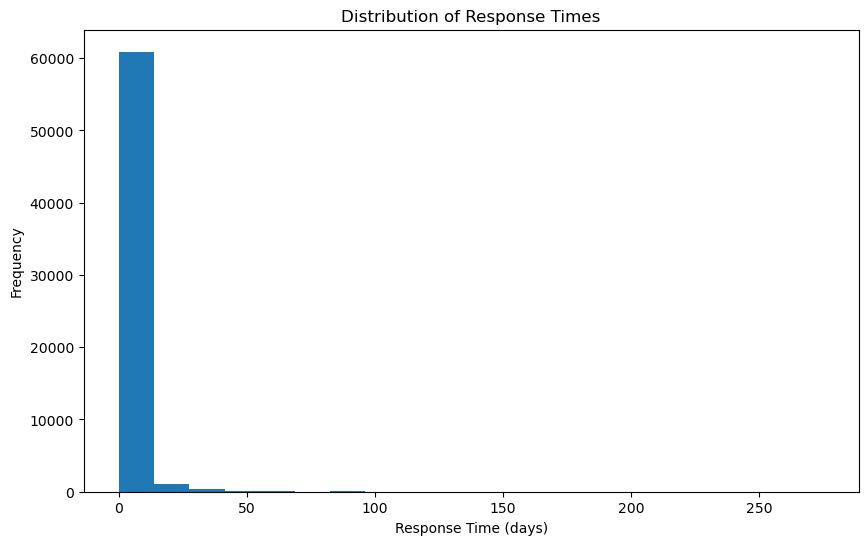

In [43]:
df['response_time'] = (pd.to_datetime(df['Date received']) - pd.to_datetime(df['Date submitted'])).dt.days
average_response_time = df['response_time'].mean()

plt.figure(figsize=(10, 6))
plt.hist(df['response_time'], bins=20)
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (days)')
plt.ylabel('Frequency')
plt.show()

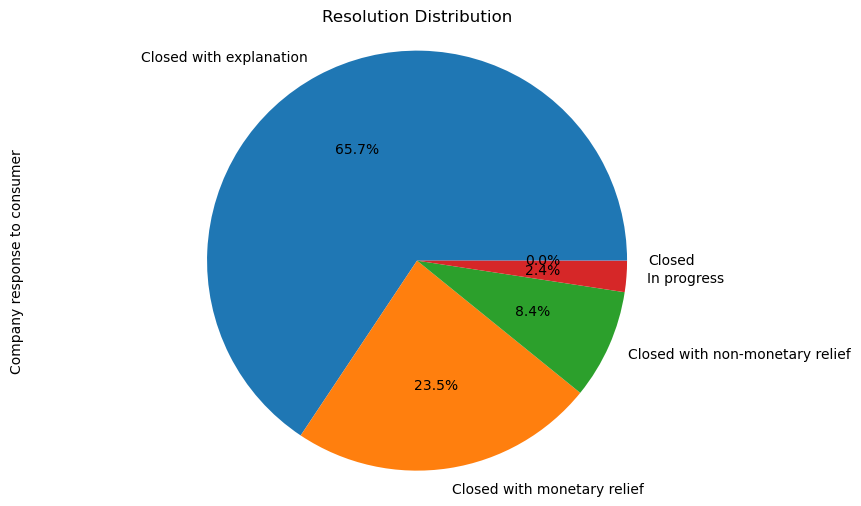

In [44]:
resolution_distribution = df['Company response to consumer'].value_counts()

plt.figure(figsize=(10, 6))
resolution_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Resolution Distribution')
plt.axis('equal')
plt.show()

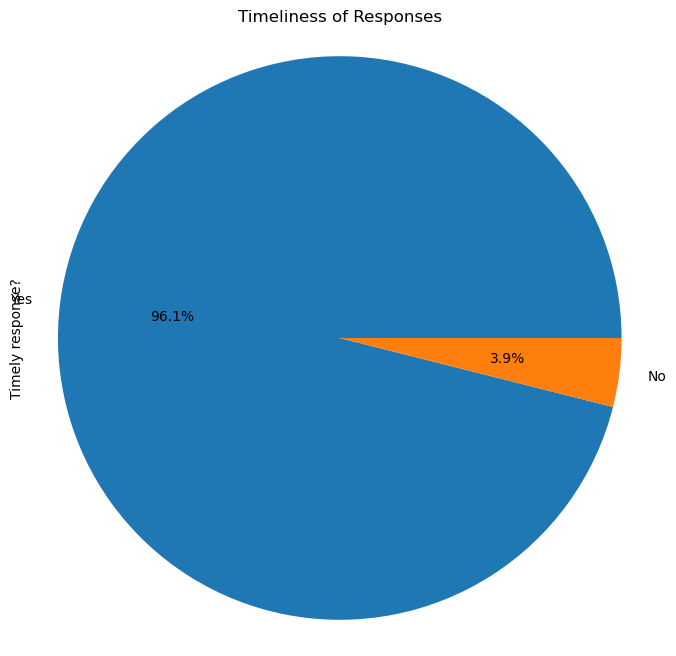

In [45]:
timeliness_distribution = df['Timely response?'].value_counts()

plt.figure(figsize=(8, 8))
timeliness_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Timeliness of Responses')
plt.axis('equal')
plt.show()

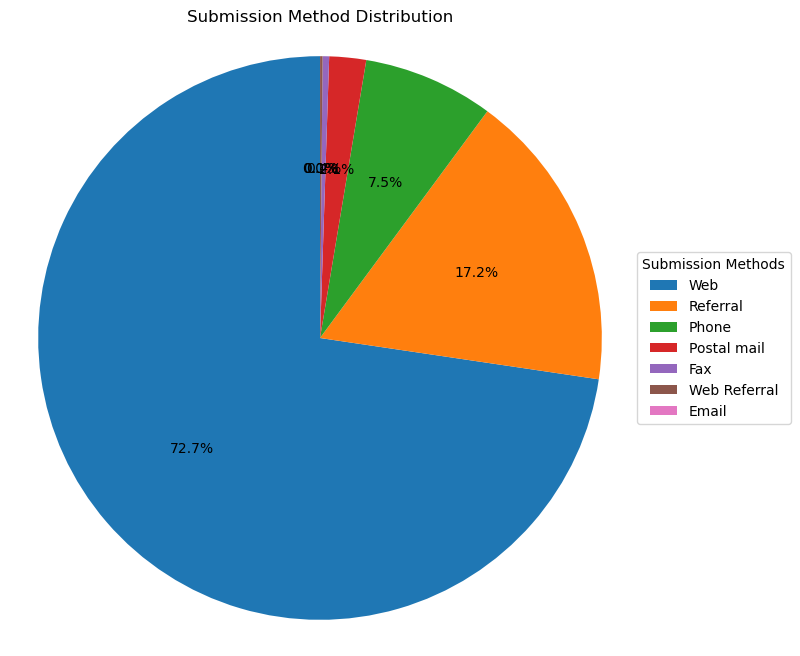

In [51]:
submission_method = df['Submitted via'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(submission_method, autopct='%1.1f%%', startangle=90)
plt.title('Submission Method Distribution')
plt.axis('equal')

plt.legend(submission_method.index, title="Submission Methods", loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

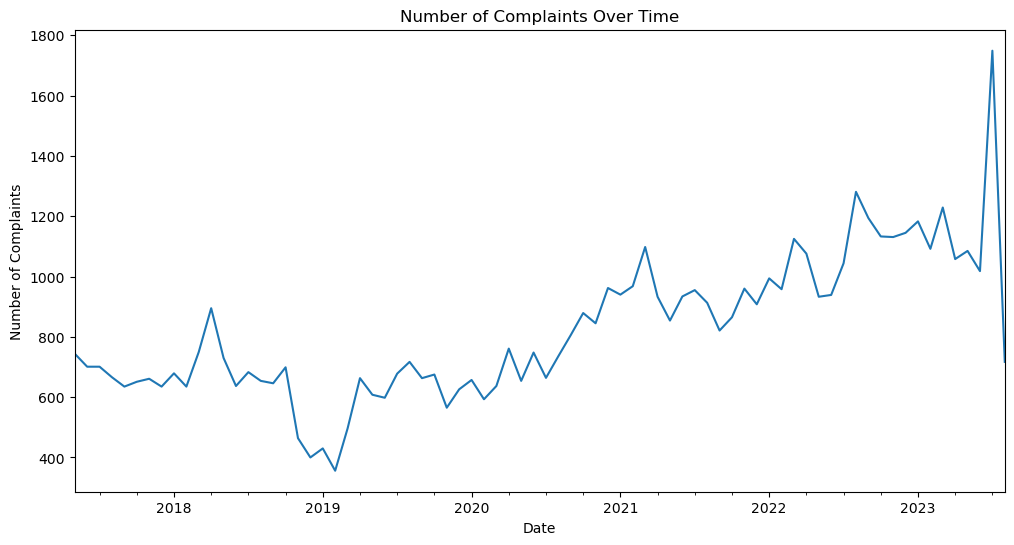

In [52]:
df['Date submitted'] = pd.to_datetime(df['Date submitted'])
time_series = df.set_index('Date submitted').resample('M')['Complaint ID'].count()

plt.figure(figsize=(12, 6))
time_series.plot()
plt.title('Number of Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()